In [174]:
## Imports and settings
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

import PIL
from PIL import ImageEnhance
from skimage import measure, filters
from skimage.restoration import denoise_tv_chambolle, denoise_bilateral
from skimage.exposure import rescale_intensity
from skimage.morphology import opening

import os
import math

image_file = '/Users/Nicke/Desktop/hackthedinos/pteradata/ct_data/Zanabazar/8-Bit/TROODON/SLICES/CORONAL/COR530.TIF'
# image_file = '/Users/Nicke/Desktop/hackthedinos/pteradata/ct_data/Chordeiles/16bitrot/chor0232.tif'

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [175]:
## Import Image
img = PIL.Image.open(image_file)
# img.show()

In [176]:
## Increase image contrast
# img = PIL.Image.open(image_file)
# enhancer = ImageEnhance.Contrast(img)
# img = enhancer.enhance(1.3)

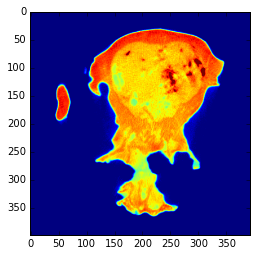

In [177]:
img_arr = np.array(img)
plt.imshow(img_arr)

In [178]:
# ## Improve contrast
# contrast_iterations = 1
# for i in range(contrast_iterations):
#     v_min, v_max = np.percentile(img_arr, (80, 100))
#     print v_min, v_max
#     img_arr = rescale_intensity(img_arr, in_range=(v_min, v_max))
# plt.imshow(img_arr)

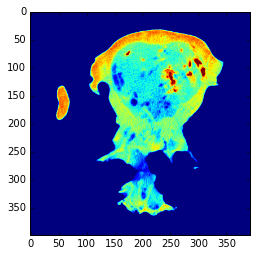

In [179]:
## Improve contrast
contrast_iterations = 3
for i in range(contrast_iterations):
    img_arr = np.clip(img_arr, 50, 255)
    img_arr = rescale_intensity(img_arr)
plt.imshow(img_arr)

(array([ 113127.,    1614.,    3138.,    9097.,   12509.,    7746.,
           4225.,    4036.,     527.,     389.]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]),
 <a list of 10 Patch objects>)

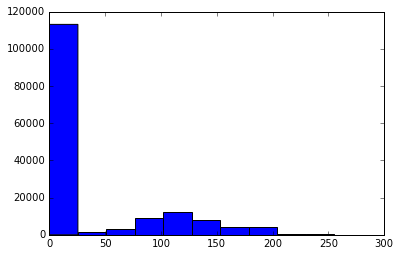

In [180]:
plt.hist(img_arr.ravel())

In [181]:
## Denoise image
img_arr = filters.restoration.denoise_bilateral(img_arr)
# denoise_weight = 100
# img_arr = denoise_tv_chambolle(img_arr, weight=denoise_weight)
# img_arr = denoise_tv_chambolle(img_arr, weight=denoise_weight)
# plt.imshow(img_arr, cmap=plt.cm.gray)

In [182]:
## Morphology operations
img_arr = opening(img_arr)

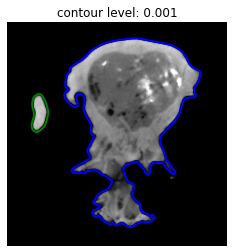

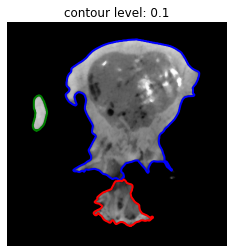

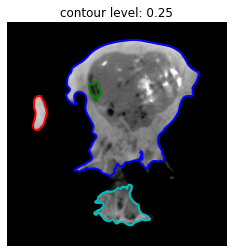

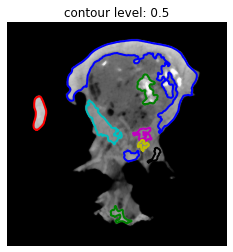

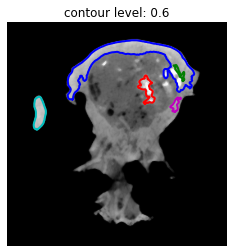

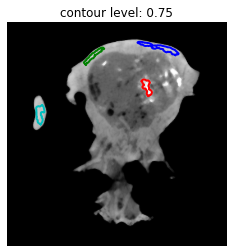

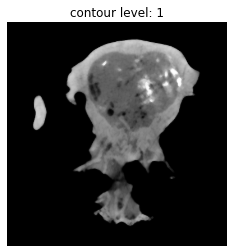

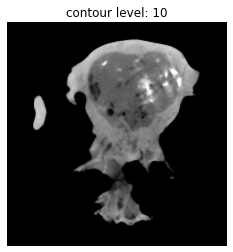

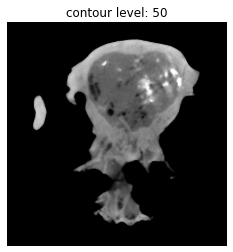

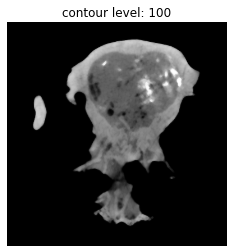

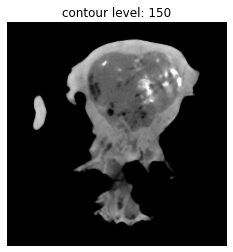

In [183]:
## Find contours
contour_levels = [.001, .1, .25, .5, .6, .75, 1, 10, 50, 100, 150]
# contour_level = .1 #Argument to find_contours
contour_thresh = 100 #Threshold to throw out contours shorter than thresh

for contour_level in contour_levels:
    contours = measure.find_contours(img_arr, contour_level)
    

    large_contours = [x for x in contours if len(x) > contour_thresh]

    # Display the image and plot all contours found
    fig, ax = plt.subplots()
    ax.imshow(img_arr, cmap=plt.cm.gray)

    for n, contour in enumerate(large_contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.title('contour level: '+str(contour_level))
    plt.show()